In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bostondata = pd.read_csv('/content/drive/MyDrive/Spark/tmpnkdmb_n6.csv')

In [ ]:
bostondata.head()

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V662945,2023-02-23 09:26:12,Open,116,NaN,Unsafe Structures,120,NaN,Foster,ST,...,22,"35 WESTBOURNE TERR, UNIT #3",NaN,BROOKLINE,MA,02445,59601,42.346613,-71.157775,"(42.34661300020374, -71.15777500143709)"
1,V662933,2023-02-23 09:04:11,Open,3307.1,NaN,Protection of Adj. Property,150,NaN,Byron,ST,...,01,150 BYRON STREET,NaN,EAST BOSTON,MA,02128,24584,42.383159,-71.015123,"(42.383159392970654, -71.01512299616597)"
2,HVIOL-662931,2023-02-23 08:56:38,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,138,NaN,Heath,ST,...,10,30 Bickford Street,NaN,Boston,MA,02130,249987,42.326090,-71.103110,"(42.326090000002694, -71.10311000125414)"
3,HVIOL-662931,2023-02-23 08:56:38,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,138,NaN,Heath,ST,...,10,30 Bickford Street,NaN,Boston,MA,02130,249987,42.326090,-71.103110,"(42.326090000002694, -71.10311000125414)"
4,HVIOL-662931,2023-02-23 08:56:38,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,138,NaN,Heath,ST,...,10,30 Bickford Street,NaN,Boston,MA,02130,249987,42.326090,-71.103110,"(42.326090000002694, -71.10311000125414)"


In [ ]:
bostondata.isnull().sum()

case_no                 0
status_dttm             0
status                  0
code                    0
value               24409
description           222
violation_stno          0
violation_sthigh    19411
violation_street        0
violation_suffix      188
violation_city          1
violation_state         0
violation_zip           8
ward                    0
contact_addr1          77
contact_addr2       20074
contact_city           65
contact_state          69
contact_zip            89
sam_id                  0
latitude                0
longitude               0
location                0
dtype: int64

In [ ]:
#add a column num and make it numeric
bostondata['month']=bostondata['status_dttm'].str.slice(5,7)

In [ ]:
bostondata['month'].unique()

array(['02', '11', '05', '01', '12', '03', '10', '09', '08', '07', '06',
       '04', ''], dtype=object)

In [ ]:
bostondata['month']=pd.to_numeric(bostondata['month'])

In [ ]:
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24409 entries, 0 to 24408
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           24409 non-null  object 
 1   status_dttm       24409 non-null  object 
 2   status            24409 non-null  object 
 3   code              24409 non-null  object 
 4   value             0 non-null      float64
 5   description       24187 non-null  object 
 6   violation_stno    24409 non-null  object 
 7   violation_sthigh  4998 non-null   object 
 8   violation_street  24409 non-null  object 
 9   violation_suffix  24221 non-null  object 
 10  violation_city    24408 non-null  object 
 11  violation_state   24409 non-null  object 
 12  violation_zip     24401 non-null  object 
 13  ward              24409 non-null  object 
 14  contact_addr1     24332 non-null  object 
 15  contact_addr2     4335 non-null   object 
 16  contact_city      24344 non-null  object

In [ ]:
bostondata['month'].value_counts()

12.0    2929
1.0     2866
9.0     2535
3.0     2187
2.0     2110
10.0    1843
6.0     1738
7.0     1705
4.0     1662
11.0    1634
8.0     1613
5.0     1585
Name: month, dtype: int64

In [ ]:
print('Latitude Information : ',bostondata['latitude'].describe())
print('Longitude Information : ',bostondata['longitude'].describe())

Latitude Information :  count    24409.000000
mean        42.321048
std          0.033558
min         42.232100
25%         42.295040
50%         42.318830
75%         42.348858
max         42.392962
Name: latitude, dtype: float64
Longitude Information :  count    24409.000000
mean       -71.082277
std          0.032159
min        -71.181830
25%        -71.097664
50%        -71.078680
75%        -71.061478
max        -70.995970
Name: longitude, dtype: float64


In [ ]:
bostondata['description'].value_counts()

Failure to Obtain Permit                                                                                                                                                                                                                3431
Unsafe and Dangerous                                                                                                                                                                                                                    3385
Owners Responsibility to Maintain Structural Elements - Structural elements  shall be maintained free from holes, cracks, loose plaster, or other defects.                                                                              2505
Owners Installation/Maintenance Responsibility - All facilities and equipment which are required by owner including but not limited to water, gas, electrical and heating, shall be installed in accordance with all accepted codes.    1386
Maintenance                                         

In [ ]:
labels=['Brighton', 'East Boston', 'Jamaica Plain', 'Dorchester',
       'Mattapan', 'Roslindale', 'Boston', 'South Boston', 'Roxbury',
       'Mission Hill', 'Hyde Park', 'Charlestown', 'Allston',
       'West Roxbury', 'Boston/', 'Chestnut Hill']

In [ ]:
x=bostondata['violation_city'].unique()
x
bostondata['violation_city'].dropna()

0             Brighton
1          East Boston
2        Jamaica Plain
3        Jamaica Plain
4        Jamaica Plain
             ...      
24404      East Boston
24405          Roxbury
24406       Roslindale
24407           Boston
24408      East Boston
Name: violation_city, Length: 24408, dtype: object

([<matplotlib.patches.Wedge at 0x7f7c772a3460>,
 [Text(0.5810849886732053, 0.9339915609568756, 'Brighton'),
  Text(-0.8518588400158978, 0.6959428975762085, 'East Boston'),
  Text(-1.0965667159045427, -0.0868414507612941, 'Jamaica Plain'),
  Text(-0.851410663690131, -0.696491121088224, 'Dorchester'),
  Text(-0.4508481024874986, -1.00336234157129, 'Mattapan'),
  Text(-0.08147689095398065, -1.0969783572343046, 'Roslindale'),
  Text(0.2265974841360561, -1.0764077202357896, 'Boston'),
  Text(0.48162288833113615, -0.988958742028996, 'South Boston'),
  Text(0.6953946649683552, -0.8523064354641171, 'Roxbury'),
  Text(0.8632961725251069, -0.6817035415072309, 'Mission Hill'),
  Text(0.9858388318532619, -0.48797725111955387, 'Hyde Park'),
  Text(1.0529319018024716, -0.31833066168157653, 'Charlestown'),
  Text(1.084637182067184, -0.18319984518923138, 'Allston'),
  Text(1.0984386697766566, -0.05858744523606955, 'West Roxbury'),
  Text(1.0999996720442116, -0.0008494131073399021, 'Boston/'),
  Text(1

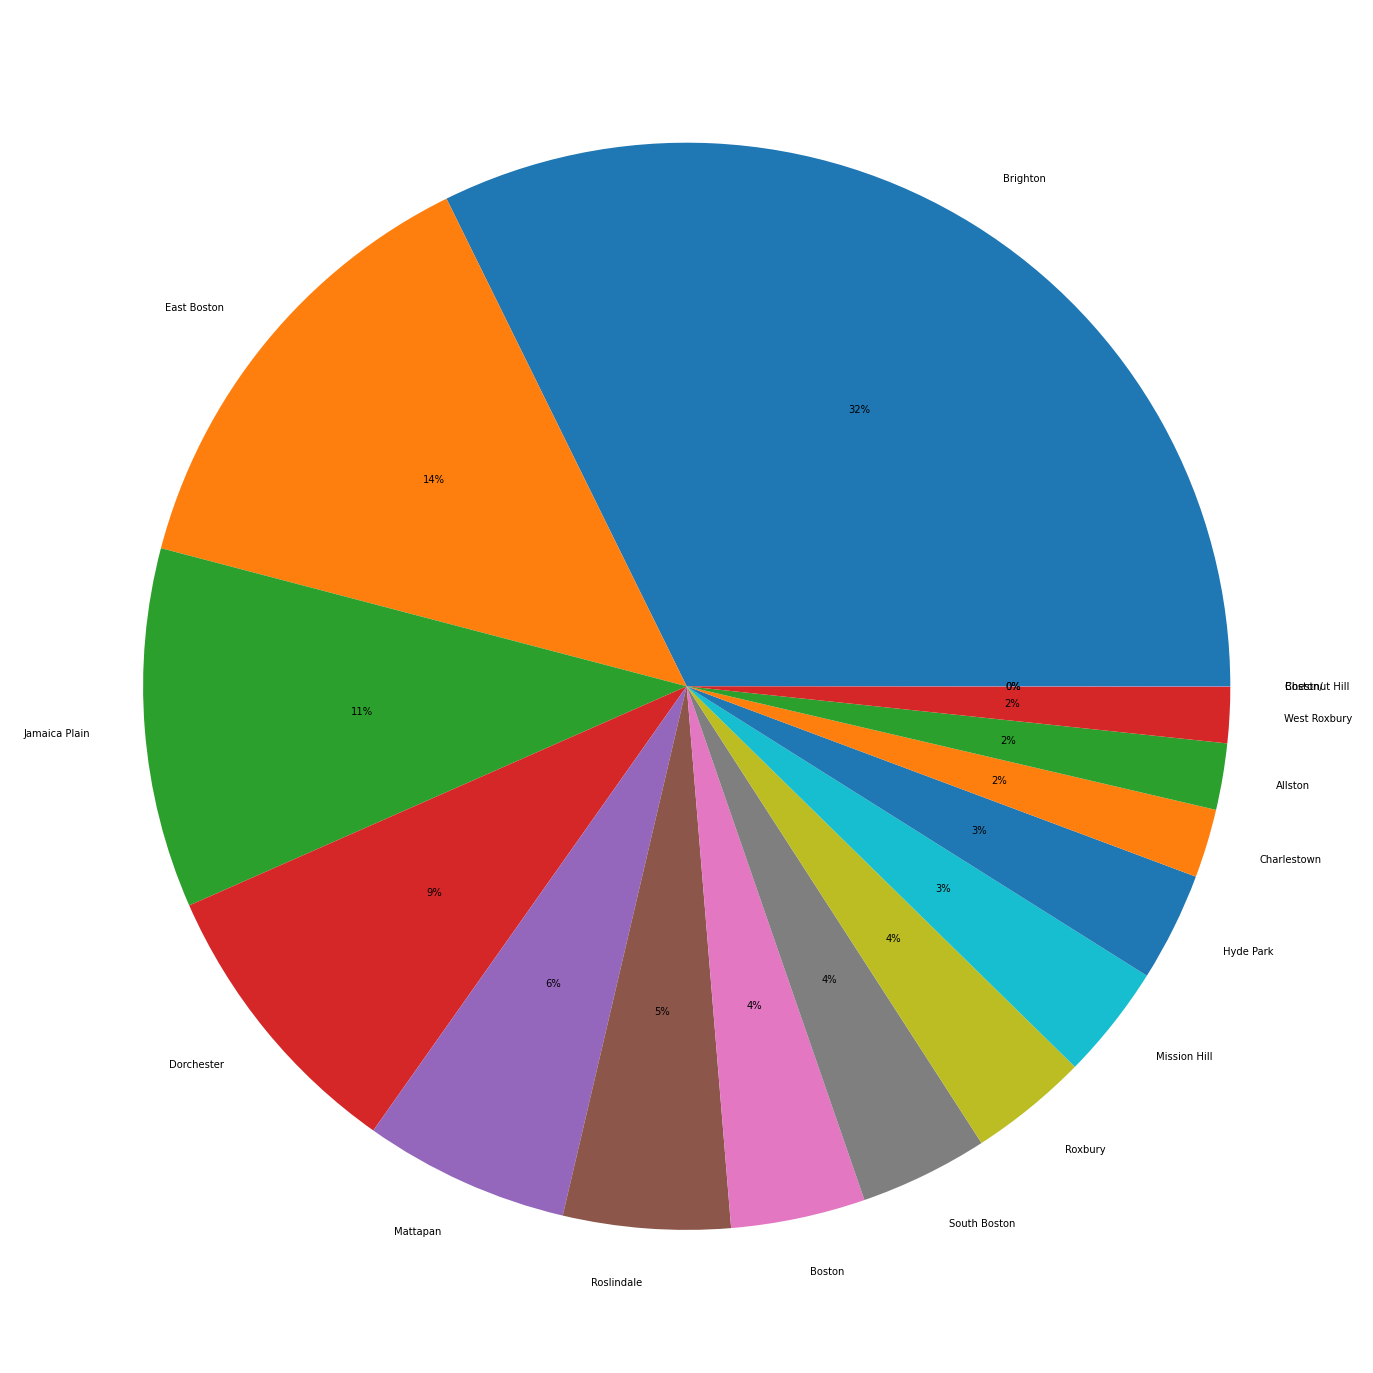

In [ ]:
plt.figure(figsize=(25,25))
plt.pie(bostondata['violation_city'].value_counts(),labels=labels,autopct='%.0f%%')

In [ ]:
bostondata[['violation_city','violation_street']].value_counts()

violation_city  violation_street
Dorchester      Blue Hill           236
East Boston     Chelsea             194
Boston          Beacon              177
Dorchester      Washington          174
East Boston     Saratoga            155
                                   ... 
Hyde Park       Albion                1
                Alwin                 1
                American Legion       1
                Avila                 1
West Roxbury    Yorktown              1
Length: 2393, dtype: int64

<AxesSubplot:xlabel='violation_city', ylabel='count'>

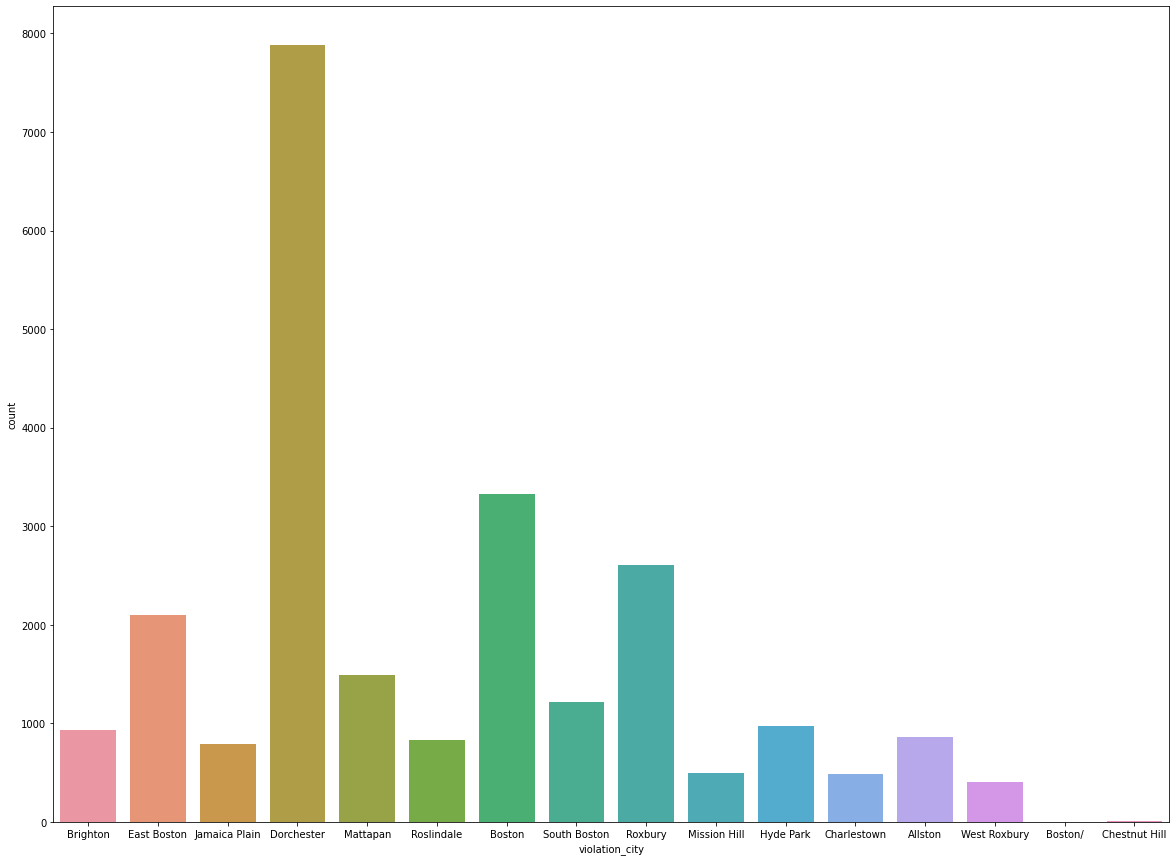

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x='violation_city',data=bostondata)